In [1]:
import pandas as pd
import numpy as np

In [2]:
# Cargar datos
# Nota: el archivo base_datos_revision.csv (que se genera en R) debe de estar en este mismo folder

df_revision=pd.read_csv('base_datos_revision.csv')
df_revision.head()

,Unnamed: 0,V1_new,primaryg_id,cluster,year,mean.pago_marginal,mean.no_empleados,mean.pago_final,var.pago_marginal,var.no_empleados,...,no.empleados_limite_inferior,no.emplados_limite_superior,no.emplados_media_primaryg_id,factor_escala_pago_final,ganancia_potencial,Revisar,group_tolerance.pago_marginal,group_tolerance.no_empleados,idsujeto,SUBACTIVIDAD
0,1,25,"1_(0,10]_2_within bounds",2,2020,165.264464,8.0,1310.8625,1508.917694,1.454545,...,6.0,6.75,6.587333,1.067607,88.623582,1,0.1,0.1,MOM942P5R,Comercio al por Menor ...
1,2,25,"1_(0,10]_2_within bounds",2,2020,165.264464,8.0,1310.8625,1508.917694,1.454545,...,6.0,6.75,6.587333,1.067607,88.623582,1,0.1,0.1,MOM942P5R,Comercio al por Menor ...
2,3,25,"1_(0,10]_2_within bounds",2,2020,165.264464,8.0,1310.8625,1508.917694,1.454545,...,6.0,6.75,6.587333,1.067607,88.623582,1,0.1,0.1,MOM942P5R,Comercio al por Menor ...
3,4,25,"1_(0,10]_2_within bounds",2,2020,165.264464,8.0,1310.8625,1508.917694,1.454545,...,6.0,6.75,6.587333,1.067607,88.623582,1,0.1,0.1,MOM942P5R,Comercio al por Menor ...
4,5,25,"1_(0,10]_2_within bounds",2,2020,165.264464,8.0,1310.8625,1508.917694,1.454545,...,6.0,6.75,6.587333,1.067607,88.623582,1,0.1,0.1,MOM942P5R,Comercio al por Menor ...


In [3]:
# Escoger datos correspondientes a los parámetros del modelo de clasificación

T_m=0.3
T_var=0.5
T_gm=0.1
T_gNE=0.1

df_revision_param=df_revision.loc[(df_revision['threshold_mean.pago_marginal']==T_m)&
               (df_revision['threshold_var.pago_marginal']==T_var)&
               (df_revision['group_tolerance.pago_marginal']==T_gm)&
               (df_revision['group_tolerance.no_empleados']==T_gNE)].copy()

boolean = df_revision_param.duplicated(subset=['V1_new']).any()
print(boolean, end='\n\n')

df_revision_param[
            ['V1_new','year',
             'Revisar','primaryg_id',
             'mean.pago_marginal','mean.no_empleados',
             'temporal_variation_type','factor_escala_pago_final']]


False



,V1_new,year,Revisar,primaryg_id,mean.pago_marginal,mean.no_empleados,temporal_variation_type,factor_escala_pago_final
4,25,2020,1,"1_(0,10]_2_within bounds",165.264464,8.000000,out of bounds,1.067607
29,26,2020,1,"1_(0,10]_2_within bounds",164.746903,8.833333,out of bounds,1.070961
94,58,2020,1,"1_(0,10]_2_out of bounds-higher payment",471.725500,4.250000,out of bounds,1.535559
289,61,2020,1,"1_(0,10]_2_within bounds",200.610202,5.416667,out of bounds,1.216123
609,64,2020,1,"1_(0,10]_2_out of bounds-higher payment",457.162125,4.833333,out of bounds,1.350233
...,...,...,...,...,...,...,...,...
1290876,4078,2020,1,"23_(10,50]_4_within bounds",191.829955,10.750000,out of bounds,1.042082
1290993,29706,2020,1,"24_(0,10]_22_within bounds",101.253750,1.000000,out of bounds,1.069341
1291806,37480,2020,1,"26_(10,50]_9_within bounds",416.368512,12.000000,out of bounds,1.096561
1292021,28435,2020,1,"30_(10,50]_4_within bounds",218.521975,10.333333,out of bounds,1.420507


In [4]:
# Extraer datos por sector económico

df_revision_sptep=df_revision_param.loc[df_revision['SUBACTIVIDAD'].str.startswith(
    'Servicios Profesionales, Técnicos, Especializados y Personales (')].copy()

df_revision_cm=df_revision_param.loc[df_revision['SUBACTIVIDAD'].str.startswith(
    'Comercio al por Mayor')].copy()

In [5]:
df_revision_sptep.columns

Index(['Unnamed: 0', 'V1_new', 'primaryg_id', 'cluster', 'year',
       'mean.pago_marginal', 'mean.no_empleados', 'mean.pago_final',
       'var.pago_marginal', 'var.no_empleados', 'var.pago_final',
       'empleados_bins', 'Zmean.pago_marginal', 'Zmean.no_empleados',
       'Zmean.pago_final', 'behavior_type', 'temporal_variation_type',
       'threshold_mean.pago_marginal', 'threshold_var.pago_marginal',
       'pago_marginal_limite_inferior', 'pago_marginal_limite_superior',
       'pago_marginal_media_primaryg_id', 'no.empleados_limite_inferior',
       'no.emplados_limite_superior', 'no.emplados_media_primaryg_id',
       'factor_escala_pago_final', 'ganancia_potencial', 'Revisar',
       'group_tolerance.pago_marginal', 'group_tolerance.no_empleados',
       'idsujeto', 'SUBACTIVIDAD'],
      dtype='object')

In [6]:
df_revision_sptep[['idsujeto','mean.pago_final','factor_escala_pago_final']]

,idsujeto,mean.pago_final,factor_escala_pago_final
503097,XJH412E7J,998.672500,1.969874
503548,JLJ465W2C,1329.300000,1.853421
503727,DVF864S8U,2468.012500,1.141273
503807,EGT186I3Z,684.180000,1.428125
504162,GKQ845F2G,156.485833,1.303459
...,...,...,...
810868,WQN187J7H,184.420000,1.060017
811128,ABE551W5P,547.867500,1.596139
811413,CAZ187V4Q,719.738750,1.507465
811998,SUO585V3A,8940.645000,1.350582


In [7]:
# Observar datos por primaryg_id

id_list=df_revision_sptep['primaryg_id'].unique()

df_revision_primary_id=df_revision_sptep[df_revision_sptep['primaryg_id']==id_list[0]]

print(len(df_revision_primary_id))
df_revision_primary_id

145


,Unnamed: 0,V1_new,primaryg_id,cluster,year,mean.pago_marginal,mean.no_empleados,mean.pago_final,var.pago_marginal,var.no_empleados,...,no.empleados_limite_inferior,no.emplados_limite_superior,no.emplados_media_primaryg_id,factor_escala_pago_final,ganancia_potencial,Revisar,group_tolerance.pago_marginal,group_tolerance.no_empleados,idsujeto,SUBACTIVIDAD
503097,503098,66,"4_(0,10]_2_within bounds",2,2020,142.667500,7.000000,998.672500,4168.915065,0.000000,...,6.083333,7.083333,6.847637,1.969874,968.586217,1,0.1,0.1,XJH412E7J,"Servicios Profesionales, Técnicos, Especializa..."
503548,503549,152,"4_(0,10]_2_within bounds",2,2020,151.631515,8.727273,1329.300000,5902.544691,0.218182,...,6.083333,7.083333,6.847637,1.853421,1134.451879,1,0.1,0.1,JLJ465W2C,"Servicios Profesionales, Técnicos, Especializa..."
503727,503728,167,"4_(0,10]_2_within bounds",2,2020,411.335417,6.000000,2468.012500,4479.361225,0.000000,...,6.083333,7.083333,6.847637,1.141273,348.663137,1,0.1,0.1,DVF864S8U,"Servicios Profesionales, Técnicos, Especializa..."
504862,504863,361,"4_(0,10]_2_within bounds",2,2020,208.039214,6.250000,1252.367500,16182.594974,0.931818,...,6.083333,7.083333,6.847637,1.350885,439.436402,1,0.1,0.1,MRQ567B9H,"Servicios Profesionales, Técnicos, Especializa..."
505470,505471,469,"4_(0,10]_2_within bounds",2,2020,439.179167,6.000000,2635.075000,3587.155404,0.000000,...,6.083333,7.083333,6.847637,1.141273,372.264531,1,0.1,0.1,MFO749M6E,"Servicios Profesionales, Técnicos, Especializa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808213,808214,49928,"4_(0,10]_2_within bounds",2,2020,154.269833,5.600000,917.272000,6012.881229,0.800000,...,6.083333,7.083333,6.847637,1.821723,753.743833,1,0.1,0.1,TAC118F3M,"Servicios Profesionales, Técnicos, Especializa..."
809752,809753,50780,"4_(0,10]_2_within bounds",2,2020,177.741562,6.500000,1330.672500,13521.107144,9.000000,...,6.083333,7.083333,6.847637,1.581155,773.326972,1,0.1,0.1,MJV885Z1H,"Servicios Profesionales, Técnicos, Especializa..."
810133,810134,52209,"4_(0,10]_2_within bounds",2,2020,164.919778,5.000000,824.598889,10278.003345,0.000000,...,6.083333,7.083333,6.847637,1.704083,580.585909,1,0.1,0.1,NFM442H4F,"Servicios Profesionales, Técnicos, Especializa..."
810376,810377,52294,"4_(0,10]_2_within bounds",2,2020,171.501413,9.250000,1605.777500,3703.581809,12.250000,...,6.083333,7.083333,6.847637,1.638686,1025.587556,1,0.1,0.1,YSN538T1B,"Servicios Profesionales, Técnicos, Especializa..."


# Correr simulación

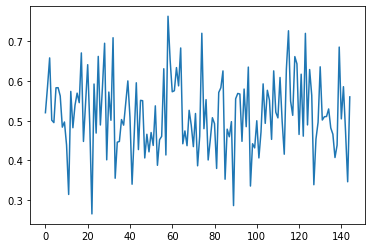

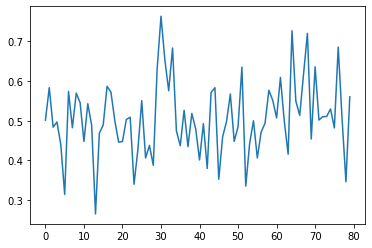

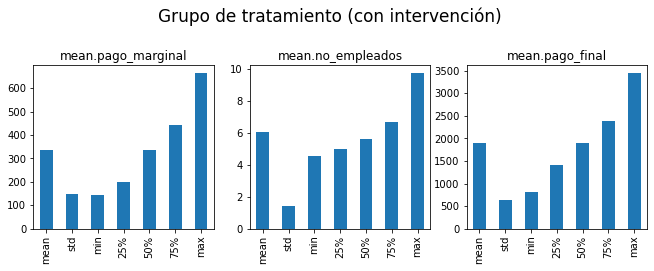

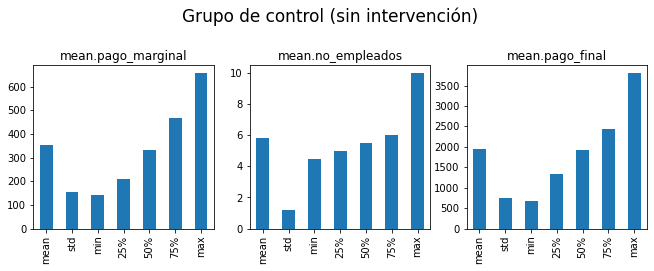

,idsujeto,b0,dummy_carta,mean.pago_marginal,mean.no_empleados,mean.pago_final,factor_escala_pago_final,random_gain_factor,random_gain,ganancia_potencial_rand
503097,XJH412E7J,1,0,142.667500,7.000000,998.672500,1.969874,0.520075,0.000000,998.672500
503548,JLJ465W2C,1,0,151.631515,8.727273,1329.300000,1.853421,0.585937,0.000000,1329.300000
503727,DVF864S8U,1,0,411.335417,6.000000,2468.012500,1.141273,0.657947,0.000000,2468.012500
504862,MRQ567B9H,1,1,208.039214,6.250000,1252.367500,1.350885,0.501235,220.261097,1472.628597
505470,MFO749M6E,1,0,439.179167,6.000000,2635.075000,1.141273,0.495172,0.000000,2635.075000
...,...,...,...,...,...,...,...,...,...,...
808213,TAC118F3M,1,1,154.269833,5.600000,917.272000,1.821723,0.504540,380.294189,1297.566189
809752,MJV885Z1H,1,0,177.741562,6.500000,1330.672500,1.581155,0.585490,0.000000,1330.672500
810133,NFM442H4F,1,0,164.919778,5.000000,824.598889,1.704083,0.472202,0.000000,824.598889
810376,YSN538T1B,1,1,171.501413,9.250000,1605.777500,1.638686,0.346300,355.160650,1960.938150


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Establecer una semilla para la generación de números aleatorios para reproducibilidad
np.random.seed(9001)

# Copiar un DataFrame llamado df_revision_primary_id en df (suponiendo que df_revision_primary_id está definido en otro lugar)
df=df_revision_primary_id.copy()

# Comprobar si la longitud del DataFrame df es mayor que 1
if len(df) > 1:
    
    # Generar números aleatorios distribuidos normalmente
    random_numbers = np.random.normal(loc=0.5, scale=0.1, size=len(df))
    
    # Agregar una columna 'random_gain_factor' al DataFrame df, que contiene los números aleatorios generados
    df['random_gain_factor'] = random_numbers
    
    # Trazar los números aleatorios generados
    plt.plot(random_numbers)
    plt.show()
    
    # Agregar columnas al DataFrame df llamadas 'b0' y 'dummy_carta'
    df['b0'] = 1
    df['dummy_carta'] = np.random.randint(2, size=len(df))  # Llenar 'dummy_carta' con números enteros aleatorios 0 o 1
    
    # Calcular una columna llamada 'random_gain' en función de los datos del DataFrame y los números aleatorios generados
    df['random_gain'] = df['mean.pago_final'] * ((df['factor_escala_pago_final'] - 1) * df['random_gain_factor']) * df['dummy_carta']
    
    # Calcular una columna adicional llamada 'ganancia_potencial_rand' basada en datos del DataFrame y la columna 'random_gain'
    df['ganancia_potencial_rand'] = df['mean.pago_final'] + df['random_gain']
    
    # Trazar una gráfica basada en los factores aleatorios generados en función de 'dummy_carta'
    plt.plot(df['random_gain_factor'].loc[df['dummy_carta']==1].values)
    plt.show()
    
    # Realizar estadísticas descriptivas sobre subconjuntos del DataFrame, dependiendo del valor de 'dummy_carta'
    df_describe_1 = df.loc[df['dummy_carta'] == 1][['mean.pago_marginal', 'mean.no_empleados', 'mean.pago_final']].describe(percentiles=None)
    df_describe_0 = df.loc[df['dummy_carta'] == 0][['mean.pago_marginal', 'mean.no_empleados', 'mean.pago_final']].describe(percentiles=None)
    
    # Crear subgráficos con estadísticas descriptivas utilizando Matplotlib
    fig, axs = plt.subplots(1, 3, figsize=(11, 3))
    for i, col in enumerate(df_describe_1.columns):
        plt.sca(axs[i])
        df_describe_1[df_describe_1.columns[i]][1:].plot(kind='bar')
        plt.title(col)
    plt.suptitle('Grupo de tratamiento (con intervención)', y=1.15, fontsize=17)
    plt.show()
    
    fig, axs = plt.subplots(1, 3, figsize=(11, 3))
    for i, col in enumerate(df_describe_0.columns):
        plt.sca(axs[i])
        df_describe_0[df_describe_0.columns[i]][1:].plot(kind='bar')
        plt.title(col)
    plt.suptitle('Grupo de control (sin intervención)', y=1.15, fontsize=17)
    plt.show()

# Imprimir una selección de columnas del DataFrame df
df[['idsujeto', 'b0', 'dummy_carta', 'mean.pago_marginal', 'mean.no_empleados', 'mean.pago_final', 'factor_escala_pago_final', 'random_gain_factor', 'random_gain', 'ganancia_potencial_rand']]


# Regresión OLS

In [11]:
import statsmodels.api as sm

# Definir las variables independientes (predictoras) para el modelo de regresión
# Seleccionar las columnas relevantes del DataFrame df como variables independientes
# Las variables independientes pueden variar dependiendo de qué columnas están siendo utilizadas en el análisis

# Enfoque 1: Incluir una columna de intercepto ('b0'), 'dummy_carta', 'mean.pago_marginal' y 'mean.no_empleados'
#X = df[['b0', 'dummy_carta', 'mean.pago_marginal', 'mean.no_empleados']]

# Enfoque 2: Excluir la columna de intercepto ('b0') y solo incluir 'dummy_carta', 'mean.pago_marginal' y 'mean.no_empleados'
#X = df[['dummy_carta', 'mean.pago_marginal', 'mean.no_empleados']]

# Enfoque 3: Incluir 'dummy_carta', 'mean.pago_final' y 'mean.no_empleados'
X = df[['dummy_carta', 'mean.pago_final', 'mean.no_empleados']]

# Definir la variable dependiente (respuesta) para el modelo de regresión
# Seleccionar la columna relevante del DataFrame df como variable dependiente
# La variable dependiente puede variar dependiendo de qué columna se está utilizando en el análisis

# Utilizar 'random_gain' como variable dependiente
#Y = df['random_gain']

# Utilizar 'ganancia_potencial_rand' como variable dependiente
Y = df['ganancia_potencial_rand']

# Crear un modelo de regresión lineal ordinaria (OLS)
model = sm.OLS(Y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Imprimir un resumen del modelo ajustado que incluye estadísticas importantes como coeficientes, errores estándar, valores p, etc.
print(results.summary())


                                   OLS Regression Results                                   
Dep. Variable:     ganancia_potencial_rand   R-squared (uncentered):                   0.997
Model:                                 OLS   Adj. R-squared (uncentered):              0.997
Method:                      Least Squares   F-statistic:                          1.508e+04
Date:                     Thu, 28 Mar 2024   Prob (F-statistic):                   1.42e-177
Time:                             15:19:39   Log-Likelihood:                         -906.66
No. Observations:                      145   AIC:                                      1819.
Df Residuals:                          142   BIC:                                      1828.
Df Model:                                3                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

In [12]:
import statsmodels.api as sm

# Definir las variables independientes (predictoras) para el modelo de regresión
# Seleccionar las columnas relevantes del DataFrame df como variables independientes
# Las variables independientes pueden variar dependiendo de qué columnas están siendo utilizadas en el análisis

# Enfoque 1: Incluir una columna de intercepto ('b0'), 'dummy_carta', 'mean.pago_marginal' y 'mean.no_empleados'
#X = df[['b0', 'dummy_carta', 'mean.pago_marginal', 'mean.no_empleados']]

# Enfoque 2: Excluir la columna de intercepto ('b0') y solo incluir 'dummy_carta', 'mean.pago_marginal' y 'mean.no_empleados'
#X = df[['dummy_carta', 'mean.pago_marginal', 'mean.no_empleados']]

# Enfoque 3: Incluir 'dummy_carta', 'mean.pago_final' y 'mean.no_empleados'
X = df[['dummy_carta', 'mean.pago_final', 'mean.no_empleados']]

# Definir la variable dependiente (respuesta) para el modelo de regresión
# Seleccionar la columna relevante del DataFrame df como variable dependiente
# La variable dependiente puede variar dependiendo de qué columna se está utilizando en el análisis

# Utilizar 'random_gain' como variable dependiente
Y = df['random_gain']

# Utilizar 'ganancia_potencial_rand' como variable dependiente
#Y = df['ganancia_potencial_rand']

# Crear un modelo de regresión lineal ordinaria (OLS)
model = sm.OLS(Y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Imprimir un resumen del modelo ajustado que incluye estadísticas importantes como coeficientes, errores estándar, valores p, etc.
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:            random_gain   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              207.4
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                    1.11e-51
Time:                        15:19:39   Log-Likelihood:                         -906.66
No. Observations:                 145   AIC:                                      1819.
Df Residuals:                     142   BIC:                                      1828.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------